In [187]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import torch
import json
import os
import seaborn as sns
FILE_PATH_DICT = "case_id_and_structure.json"
with open(FILE_PATH_DICT, 'r') as file:
    file_parsed = json.load(file)

copy_number_folder_list = []
for key in file_parsed.keys():
    copy_number_folder_list.append(file_parsed[key]["files"]["copy_number"])

        

In [142]:
PATH_COPY_NUMBER = "/Users/davidelupo/Desktop/AI_Bioinformatics_GitHub/AI_for_Bioinformatics_Project/Copy_Number"
number_of_rows = []
list_df_CNV = []
for root, dirs, files in os.walk(PATH_COPY_NUMBER):
    for dir in dirs:
        for root, dirs, files in os.walk(PATH_COPY_NUMBER + "/" + dir):
            for file in files:
                if file in copy_number_folder_list:
                    list_df_CNV.append(pd.read_csv(PATH_COPY_NUMBER + "/" + dir + "/" + file, sep='\t'))
                    with open(PATH_COPY_NUMBER + "/" + dir + "/" + file, 'r') as fp:
                        lines = len(fp.readlines())
                        number_of_rows.append(int(lines))

copy_number = pd.Series(number_of_rows)


In [143]:
gene_id_list = []
with open('gene_id_protein_coding.json') as json_file:
   gene_id_list = json.load(json_file)
print(len(gene_id_list))

20092


In [156]:
# Converti gene_id_list in un set per velocizzare le operazioni di lookup
gene_id_set = set(gene_id_list)

# Itera su ogni dataframe nella lista e verifica se i valori di 'gene_id' sono nel set
list_df_CNV_filtered = []

for df in list_df_CNV:
    # Filtra le righe del dataframe dove 'gene_id' è presente in gene_id_set
    df_filtered = df[df['gene_id'].isin(gene_id_set)]
    list_df_CNV_filtered.append(df_filtered)



In [158]:
df_rows = []
for df in list_df_CNV_filtered:
    df_rows.append(len(df))
print(set(df_rows))

{14155}


{1025, 1028, 1158, 1032, 9, 10, 8, 11, 1037, 12, 15, 1168, 1040, 13, 1035, 1044, 14, 1045, 1149, 1049, 1055, 33, 34, 930, 1060, 37, 35, 38, 1057, 36, 939, 1072, 945, 1074, 1075, 1076, 948, 944, 1079, 1202, 1084, 957, 1087, 959, 962, 1097, 969, 970, 974, 1033, 976, 977, 978, 1107, 986, 1115, 1116, 990, 1118, 992, 1122, 996, 998, 999, 1002, 1135, 1010, 1011, 1013, 1016, 1021, 1150}


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


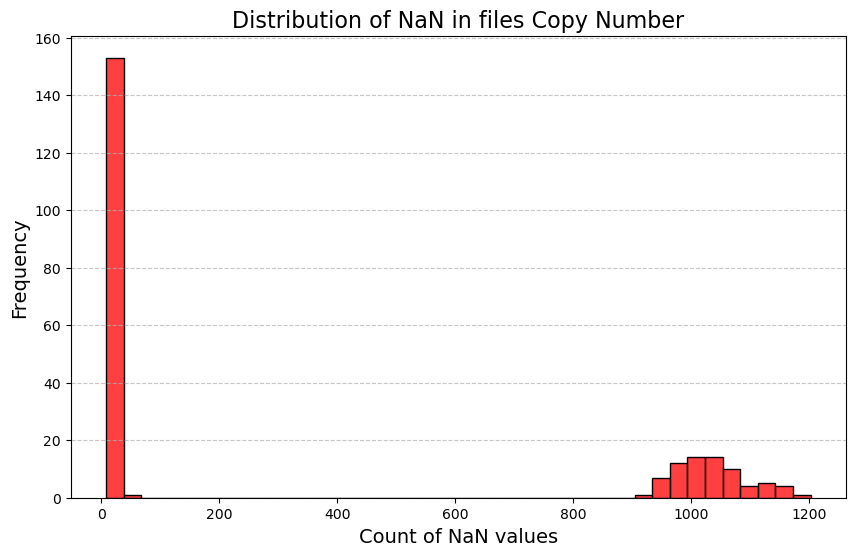

In [159]:
list_NaN = []
for i in range(len(list_df_CNV_filtered)):
    list_NaN.append(list_df_CNV_filtered[i]['copy_number'].isnull().sum())
print(set(list_NaN))
#pd.Series(list_NaN).hist()
plt.figure(figsize=(10, 6))
sns.histplot(list_NaN, bins=40, kde=False, color="red")
plt.title("Distribution of NaN in files Copy Number", fontsize=16)
plt.xlabel("Count of NaN values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [162]:
list_df_CNV_filtered[0].head()

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
62,ENSG00000188976.11,NOC2L,chr1,944203,959309,NaN,NaN,NaN
64,ENSG00000187583.11,PLEKHN1,chr1,966482,975865,NaN,NaN,NaN
67,ENSG00000188290.11,HES4,chr1,998962,1000172,NaN,NaN,NaN
68,ENSG00000187608.10,ISG15,chr1,1001138,1014540,NaN,NaN,NaN
75,ENSG00000237330.3,RNF223,chr1,1070967,1074306,NaN,NaN,NaN


In some occasions, one gene may overlap with more than one segment. In this case, min_copy_number is the minimum value of all segments it overlaps, max_copy_number is the maximum value of all segments it overlaps, and copy_number is calculated as the weighted (on length of overlapped regions) median of copy number values from all overlapped segments. When there is a tie (very rare), the smaller number is used. If a gene overlaps with only one segment, copy_number = min_copy_number = max_copy_number. If a gene overlaps with no segments, the gene gets empty value "" in copy_number, min_copy_number and max_copy_number. [GDC documentation](https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/CNV_Pipeline/)

In [163]:
list_df_filled = []
for i in range(len(list_df_CNV_filtered)):
    list_df_filled.append(list_df_CNV_filtered[i].fillna(0))

In [164]:
list_df_filled[0].head()

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
62,ENSG00000188976.11,NOC2L,chr1,944203,959309,0.0,0.0,0.0
64,ENSG00000187583.11,PLEKHN1,chr1,966482,975865,0.0,0.0,0.0
67,ENSG00000188290.11,HES4,chr1,998962,1000172,0.0,0.0,0.0
68,ENSG00000187608.10,ISG15,chr1,1001138,1014540,0.0,0.0,0.0
75,ENSG00000237330.3,RNF223,chr1,1070967,1074306,0.0,0.0,0.0


In [165]:
print(list_df_filled[0].isna().sum())  # Verifica che non ci siano più valori NaN

gene_id            0
gene_name          0
chromosome         0
start              0
end                0
copy_number        0
min_copy_number    0
max_copy_number    0
dtype: int64


Numero di nodi: 200
Numero di archi: 25


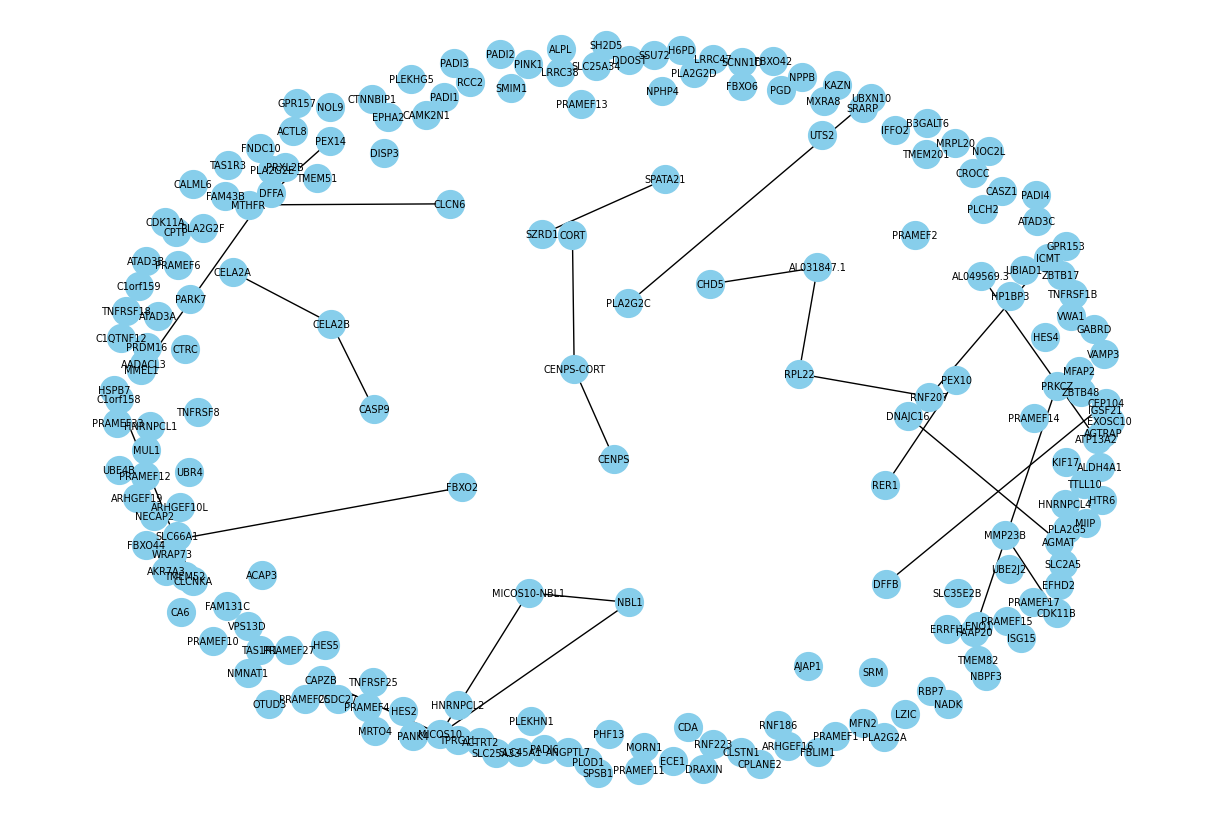

In [179]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#per fare testing considero per ora solo un subset dei 60.000 geni totali relativi a un paziente specifico
df_CNV = list_df_filled[0][:200]
# Crea un grafo vuoto
G = nx.Graph()

# Aggiungi i geni come nodi
for _, row in df_CNV.iterrows():
    G.add_node(row['gene_name'], x=row['copy_number'])

# Aggiungi archi basati sulla sovrapposizione delle coordinate (start, end)
for i, gene1 in df_CNV.iterrows():
    for j, gene2 in df_CNV.iterrows():
        if i >= j:
            continue  # Evita di considerare due volte la stessa coppia
        if gene1['chromosome'] == gene2['chromosome']:
            # Controlla la sovrapposizione dei segmenti
            if (gene1['start'] <= gene2['end']) and (gene1['end'] >= gene2['start']):
                G.add_edge(gene1['gene_name'], gene2['gene_name'])

# Mostra informazioni sul grafo
print("Numero di nodi:", G.number_of_nodes())
print("Numero di archi:", G.number_of_edges())

# Visualizza il grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G,k=0.5)  # Layout del grafo
#pos = nx.shell_layout(G)
#pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=400, node_color="skyblue", font_size=7, font_color="black")
plt.show()


In [170]:
# Numero di nodi (geni) e archi (relazioni di sovrapposizione)
print("Numero di nodi:", G.number_of_nodes())
print("Numero di archi:", G.number_of_edges())

# Grado di ciascun nodo (numero di connessioni per gene)
degrees = dict(G.degree())
print("Gradi dei nodi:", degrees)

# Nodo con il massimo grado (gene con più connessioni)
max_degree_node = max(degrees, key=degrees.get)
print(f"Gene con il massimo grado: {max_degree_node} ({degrees[max_degree_node]} connessioni)")


Numero di nodi: 2000
Numero di archi: 308
Gradi dei nodi: {'NOC2L': 0, 'PLEKHN1': 0, 'HES4': 0, 'ISG15': 0, 'RNF223': 0, 'C1orf159': 0, 'TTLL10': 0, 'TNFRSF18': 0, 'B3GALT6': 0, 'C1QTNF12': 0, 'UBE2J2': 0, 'SCNN1D': 0, 'ACAP3': 0, 'CPTP': 0, 'TAS1R3': 0, 'MXRA8': 0, 'MRPL20': 0, 'VWA1': 0, 'ATAD3C': 0, 'ATAD3B': 0, 'ATAD3A': 0, 'SSU72': 0, 'FNDC10': 0, 'MMP23B': 1, 'CDK11B': 1, 'SLC35E2B': 0, 'CDK11A': 0, 'NADK': 0, 'CALML6': 0, 'TMEM52': 0, 'GABRD': 0, 'PRKCZ': 1, 'FAAP20': 1, 'MORN1': 0, 'RER1': 1, 'PEX10': 1, 'PLCH2': 0, 'PANK4': 0, 'HES5': 0, 'PRXL2B': 1, 'MMEL1': 1, 'ACTRT2': 0, 'PRDM16': 0, 'ARHGEF16': 0, 'TPRG1L': 0, 'WRAP73': 0, 'CCDC27': 0, 'SMIM1': 0, 'LRRC47': 0, 'CEP104': 1, 'DFFB': 1, 'AJAP1': 0, 'NPHP4': 0, 'CHD5': 1, 'AL031847.1': 2, 'RPL22': 2, 'RNF207': 2, 'ICMT': 1, 'GPR153': 0, 'HES2': 0, 'TNFRSF25': 0, 'PLEKHG5': 0, 'NOL9': 0, 'TAS1R1': 0, 'ZBTB48': 0, 'PHF13': 0, 'VAMP3': 0, 'UTS2': 0, 'PARK7': 0, 'ERRFI1': 0, 'SLC45A1': 0, 'ENO1': 0, 'CA6': 0, 'SLC2A5': 0, 'GPR157

In [171]:
# Trova tutte le componenti connesse
connected_components = list(nx.connected_components(G))
print("Numero di componenti connesse:", len(connected_components))

# Mostra le componenti
# for i, component in enumerate(connected_components):
#     print(f"Component {i + 1}: {component}")


Numero di componenti connesse: 1713


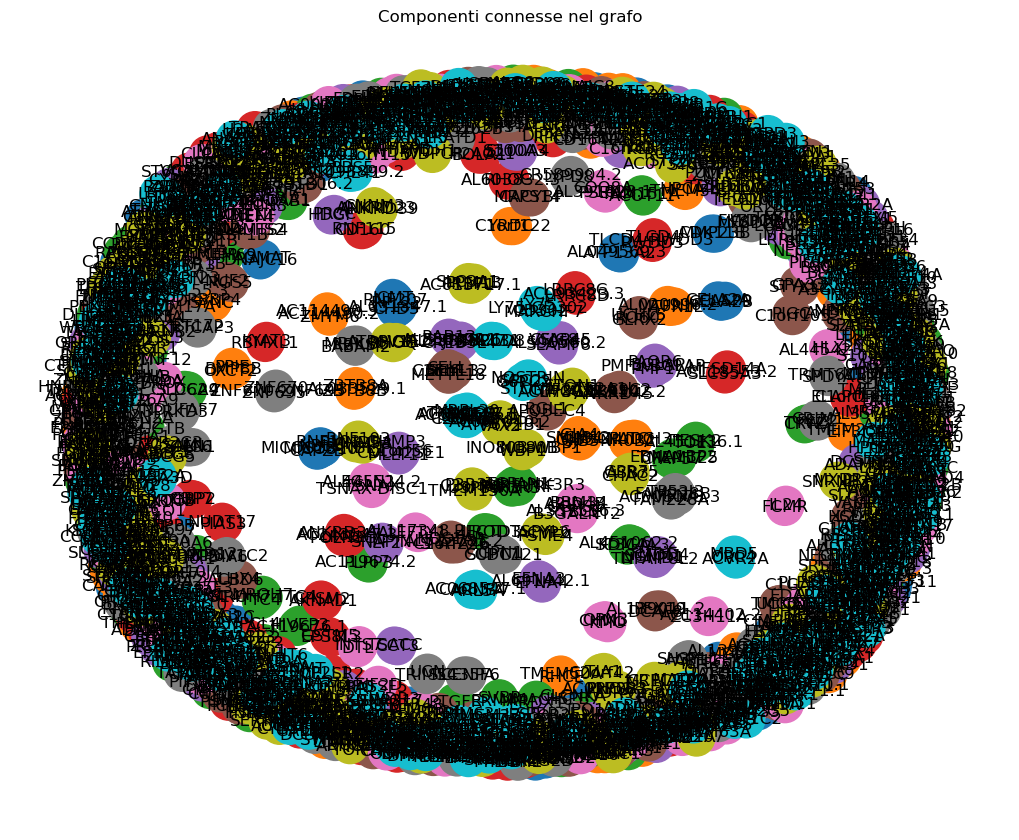

In [172]:
import matplotlib.pyplot as plt

# Assegna un colore a ogni componente connessa
color_map = {}
for i, component in enumerate(connected_components):
    for node in component:
        color_map[node] = i  # Assegna un ID colore per ogni componente

# Colori per i nodi
colors = [color_map[node] for node in G.nodes]

# Disegna il grafo con i colori delle componenti
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(
    G, pos, node_color=colors, with_labels=True, 
    node_size=700, cmap=plt.cm.tab10
)
plt.title("Componenti connesse nel grafo")
plt.show()


In [133]:
from networkx.algorithms.community import greedy_modularity_communities

# Trova comunità usando la modularità
communities = list(greedy_modularity_communities(G))
print("Numero di comunità trovate:", len(communities))

# Mostra le comunità
for i, community in enumerate(communities):
    print(f"Comunità {i + 1}: {sorted(community)}")


Numero di comunità trovate: 43
Comunità 1: ['AC114498.1', 'AC114498.2', 'AL669831.1', 'AL669831.2', 'AL669831.3', 'AL669831.4', 'AL669831.6', 'CICP3', 'FAM87B', 'LINC00115', 'LINC01128', 'LINC01409', 'MTATP6P1', 'MTATP8P1', 'MTCO1P12', 'MTCO2P12', 'MTCO3P12', 'MTND1P23', 'MTND2P28', 'OR4F16', 'RNU6-1199P', 'WBP1LP6']
Comunità 2: ['AL732372.1', 'AL732372.2', 'AL732372.3', 'AP006222.1', 'AP006222.2', 'CICP7', 'OR4F29', 'RPL23AP24', 'U6', 'WBP1LP7']
Comunità 3: ['ACAP3', 'AL139287.1', 'INTS11', 'MIR6726', 'MIR6727', 'PUSL1']
Comunità 4: ['DDX11L1', 'MIR1302-2', 'MIR1302-2HG', 'MIR6859-1', 'WASH7P']
Comunità 5: ['AL669831.5', 'AL669831.7', 'FAM41C', 'TUBB8P11']
Comunità 6: ['AL627309.1', 'AL627309.3', 'CICP27']
Comunità 7: ['AL627309.4', 'AL627309.5', 'RNU6-1100P']
Comunità 8: ['AL645608.2', 'AL645608.4', 'AL645608.6']
Comunità 9: ['AL645608.1', 'AL645608.3', 'ISG15']
Comunità 10: ['MIR6859-2', 'WASH9P']
Comunità 11: ['NOC2L', 'SAMD11']
Comunità 12: ['PERM1', 'PLEKHN1']
Comunità 13: ['AGRN

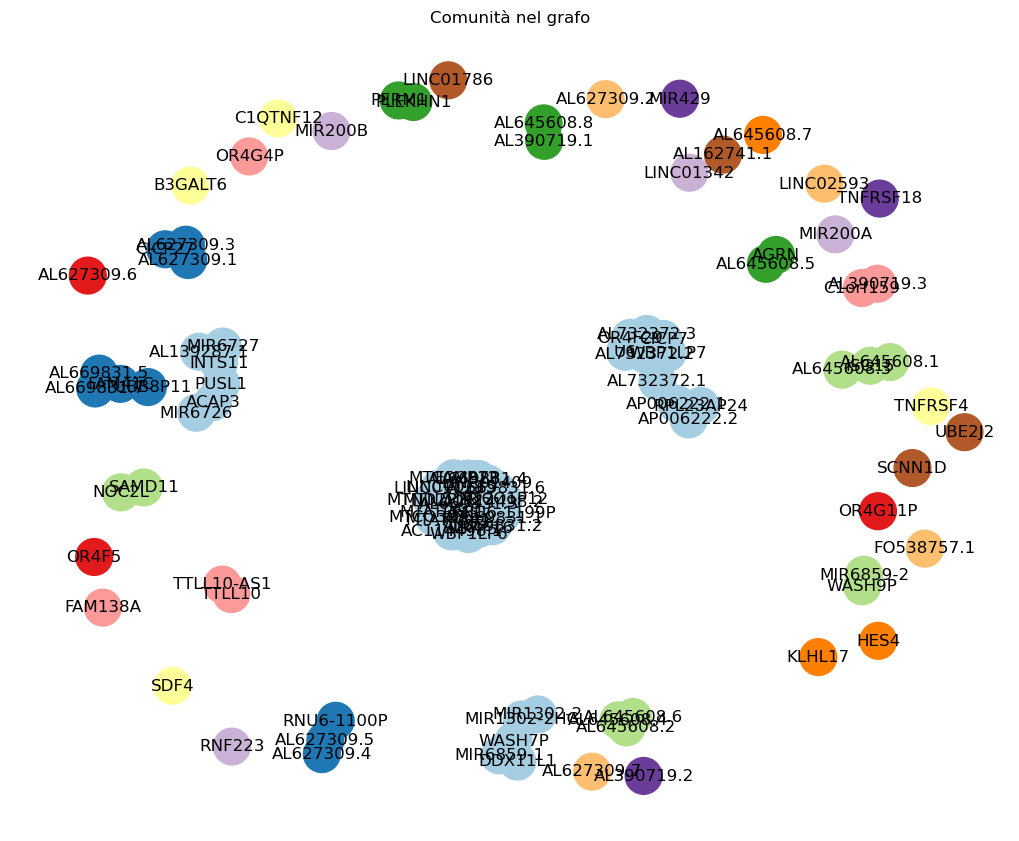

In [134]:
# Assegna un colore a ogni comunità
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Colori per i nodi
community_colors = [community_map[node] for node in G.nodes]

# Disegna il grafo con i colori delle comunità
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, node_color=community_colors, with_labels=True, 
    node_size=700, cmap=plt.cm.Paired
)
plt.title("Comunità nel grafo")
plt.show()


In [135]:
# Coefficiente di clustering globale
global_clustering = nx.average_clustering(G)
print("Coefficiente di clustering globale:", global_clustering)

# Coefficiente di clustering per ciascun nodo
clustering_per_node = nx.clustering(G)
print("Clustering per nodo:", clustering_per_node)

#Il coefficiente di clustering misura quanto un nodo è parte di una "triade",
# ovvero se i suoi vicini sono collegati tra loro.

Coefficiente di clustering globale: 0.1570952380952381
Clustering per nodo: {'DDX11L1': 0, 'WASH7P': 0, 'MIR6859-1': 0, 'MIR1302-2HG': 0, 'MIR1302-2': 0, 'FAM138A': 0, 'OR4G4P': 0, 'OR4G11P': 0, 'OR4F5': 0, 'AL627309.1': 0, 'AL627309.3': 0, 'CICP27': 0, 'AL627309.6': 0, 'AL627309.7': 0, 'AL627309.2': 0, 'AL627309.5': 0, 'RNU6-1100P': 0, 'AL627309.4': 0, 'FO538757.1': 0, 'WASH9P': 0, 'MIR6859-2': 0, 'AP006222.1': 0, 'AP006222.2': 0, 'RPL23AP24': 0, 'AL732372.1': 0, 'AL732372.2': 0, 'WBP1LP7': 0, 'OR4F29': 0, 'CICP7': 0, 'AL732372.3': 0, 'U6': 0, 'AL669831.3': 0.04285714285714286, 'AC114498.1': 0, 'MTND1P23': 0, 'MTND2P28': 0, 'MTCO1P12': 1.0, 'AC114498.2': 1.0, 'MTCO2P12': 0, 'MTATP8P1': 1.0, 'MTATP6P1': 0.6666666666666666, 'MTCO3P12': 1.0, 'WBP1LP6': 0, 'OR4F16': 0, 'CICP3': 0, 'AL669831.1': 0.6666666666666666, 'RNU6-1199P': 1.0, 'AL669831.2': 1.0, 'LINC01409': 0.6666666666666666, 'AL669831.6': 1.0, 'AL669831.4': 0.6666666666666666, 'FAM87B': 1.0, 'LINC01128': 1.0, 'LINC00115': 1.0, 'A

In [193]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx
pyg_graph = from_networkx(G)
pyg_graph['y'] = torch.tensor([2]) #qui va inserito l'Overall survival

In [191]:
pyg_graph

Data(x=[200], edge_index=[2, 50], y=[1])

In [195]:
pyg_graph.edge_index

tensor([[ 23,  24,  31,  32,  34,  35,  39,  40,  49,  50,  53,  54,  54,  55,
          55,  56,  56,  57,  86,  86,  87,  88,  89,  90,  97,  98, 102, 103,
         135, 136, 136, 137, 138, 139, 145, 146, 152, 153, 157, 158, 174, 175,
         175, 175, 176, 176, 177, 177, 186, 187],
        [ 24,  23,  32,  31,  35,  34,  40,  39,  50,  49,  54,  53,  55,  54,
          56,  55,  57,  56,  87,  88,  86,  86,  90,  89,  98,  97, 103, 102,
         136, 135, 137, 136, 139, 138, 146, 145, 153, 152, 158, 157, 175, 174,
         176, 177, 175, 177, 175, 176, 187, 186]])

In [196]:
pyg_graph.x

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.])